<a href="https://colab.research.google.com/github/Hafsa620/PAI/blob/main/Chapter_no_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import librares

In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing  import OneHotEncoder, FunctionTransformer,MinMaxScaler
from sklearn.pipeline import Pipeline

# Loading Dataset

In [2]:
data=pd.read_csv('Titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.nunique(axis=0)

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


Column Transformer

In [8]:
def impute_embarked(X):
  X['Embarked']=X['Embarked'].fillna(X['Embarked'].mode()[0])
  return X

preprocessor=ColumnTransformer(transformers=[('age_encoder',Pipeline(steps=[('age_imputer',SimpleImputer(strategy='mean')),
                                             ('age_scaler',MinMaxScaler())]),['Age']),
                                             ('embarked_encoder',Pipeline(steps=[('embarked_imputer',FunctionTransformer(impute_embarked)),('ohe',OneHotEncoder())]),['Embarked']),
                                              ('onehot',OneHotEncoder(),['Sex']),('fare_scaler',MinMaxScaler(),['Fare'])],remainder='passthrough')

transformed_data=preprocessor.fit_transform(data)
#print(f'Transformed Data:{transformed_data}')
print(f'Original Data:{data}')


print(f'Transformed Data:{pd.DataFrame(transformed_data)}')

transformed_data.shape

Original Data:     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ... 

(891, 15)

In [9]:
transformed_Data=pd.DataFrame(transformed_data)
transformed_Data.rename(columns={
    0: 'Scaled_Age',
    1: 'Embarked_C',
    2: 'Embarked_Q',
    3: 'Embarked_S',
    4: 'Sex_male',
    5: 'Sex_female',
    6: 'Scaled_Fare',
    7: 'PassengerId',
    8: 'Survived',
    9: 'Pclass',
    10: 'Name',
    11: 'SibSp',
    12: 'ParCh',
    13: 'Ticket',
    14: 'Cabin'
}, inplace=True)

In [10]:
transformed_Data.head()

,Scaled_Age,Embarked_C,Embarked_Q,Embarked_S,Sex_male,Sex_female,Scaled_Fare,PassengerId,Survived,Pclass,Name,SibSp,ParCh,Ticket,Cabin
0,0.271174,0.0,0.0,1.0,0.0,1.0,0.014151,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,NaN
1,0.472229,1.0,0.0,0.0,1.0,0.0,0.139136,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,C85
2,0.321438,0.0,0.0,1.0,1.0,0.0,0.015469,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,NaN
3,0.434531,0.0,0.0,1.0,1.0,0.0,0.103644,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,C123
4,0.434531,0.0,0.0,1.0,0.0,1.0,0.015713,5,0,3,"Allen, Mr. William Henry",0,0,373450,NaN


Feature engineering

In [11]:
transformed_Data['FamilySize']=transformed_Data['SibSp']+transformed_Data['ParCh']
transformed_Data.head()

,Scaled_Age,Embarked_C,Embarked_Q,Embarked_S,Sex_male,Sex_female,Scaled_Fare,PassengerId,Survived,Pclass,Name,SibSp,ParCh,Ticket,Cabin,FamilySize
0,0.271174,0.0,0.0,1.0,0.0,1.0,0.014151,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,NaN,1
1,0.472229,1.0,0.0,0.0,1.0,0.0,0.139136,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,C85,1
2,0.321438,0.0,0.0,1.0,1.0,0.0,0.015469,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,NaN,0
3,0.434531,0.0,0.0,1.0,1.0,0.0,0.103644,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,C123,1
4,0.434531,0.0,0.0,1.0,0.0,1.0,0.015713,5,0,3,"Allen, Mr. William Henry",0,0,373450,NaN,0


Drop irrelevant columns

In [12]:
transformed_Data.drop(columns=['PassengerId','Name','Ticket','Cabin','ParCh','SibSp'],inplace=True)
transformed_Data.head()

,Scaled_Age,Embarked_C,Embarked_Q,Embarked_S,Sex_male,Sex_female,Scaled_Fare,Survived,Pclass,FamilySize
0,0.271174,0.0,0.0,1.0,0.0,1.0,0.014151,0,3,1
1,0.472229,1.0,0.0,0.0,1.0,0.0,0.139136,1,1,1
2,0.321438,0.0,0.0,1.0,1.0,0.0,0.015469,1,3,0
3,0.434531,0.0,0.0,1.0,1.0,0.0,0.103644,1,1,1
4,0.434531,0.0,0.0,1.0,0.0,1.0,0.015713,0,3,0


In [13]:
transformed_Data.shape

(891, 10)

In [14]:
from sklearn.model_selection import train_test_split
# Features and Target
X = transformed_Data.drop('Survived', axis=1)
y = transformed_Data['Survived']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Feature Engineering (Polynomial Features)

In [15]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial expansion
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

Train Models

In [16]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score

In [17]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SGD Classifier': SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3),
    'Ridge Classifier': RidgeClassifier(),
    'Lasso (Regression)': Lasso(alpha=0.01),
    'Linear Regression': LinearRegression()
}


In [18]:
results=[]

In [19]:
# Train and evaluate each model
for name, model in models.items():
    start_time = time.time()

    # Convert y_train and y_test to int type for classification models
    if name not in ['Lasso (Regression)', 'Linear Regression']:
        y_train_clf = y_train.astype(int)
        y_test_clf = y_test.astype(int)
    else:
        y_train_clf = y_train
        y_test_clf = y_test


    if name in ['Lasso (Regression)', 'Linear Regression']:
        model.fit(X_train_poly, y_train_clf)
        y_pred = model.predict(X_test_poly)
        y_pred_clf = (y_pred > 0.5).astype(int)

        # Convert y_test_clf to a NumPy array for consistent input to classification metrics
        y_test_clf_np = y_test_clf.values

        # Calculate MSE first, then take the square root for RMSE
        # Use the NumPy array version of y_test_clf for metrics
        mse = mean_squared_error(y_test_clf_np, y_pred)
        rmse = np.sqrt(mse) # Calculate RMSE by taking the square root of MSE
        r2 = r2_score(y_test_clf_np, y_pred) # Use the NumPy array version of y_test_clf for metrics

        # Use the NumPy array version of y_test_clf and y_pred_clf for classification metrics
        # Explicitly convert to int64 to ensure consistency
        acc = accuracy_score(y_test_clf_np.astype('int64'), y_pred_clf.astype('int64'))
        f1 = f1_score(y_test_clf_np.astype('int64'), y_pred_clf.astype('int64'))
    else:
        model.fit(X_train, y_train_clf)
        y_pred = model.predict(X_test)

        # Convert y_test_clf to a NumPy array for consistent input to classification metrics
        y_test_clf_np = y_test_clf.values

        # Use the NumPy array version of y_test_clf and y_pred for classification metrics
        # Explicitly convert to int64 to ensure consistency
        acc = accuracy_score(y_test_clf_np.astype('int64'), y_pred.astype('int64'))
        f1 = f1_score(y_test_clf_np.astype('int64'), y_pred.astype('int64'))
        rmse = None
        r2 = None

    duration = time.time() - start_time

    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'F1-Score': round(f1, 4),
        'RMSE': round(rmse, 4) if rmse is not None else '-', # Check for None explicitly
        'R²': round(r2, 4) if r2 is not None else '-', # Check for None explicitly
        'Training Time (s)': round(duration, 4)
    })

In [20]:
# Display comparison table
results_df = pd.DataFrame(results)
print("\nModel Comparison Table:\n")
print(results_df)


Model Comparison Table:

                 Model  Accuracy  F1-Score    RMSE      R²  Training Time (s)
0  Logistic Regression    0.8101    0.7606       -       -             0.0192
1       SGD Classifier    0.7877    0.7164       -       -             0.0173
2     Ridge Classifier    0.7933    0.7376       -       -             0.0107
3   Lasso (Regression)    0.7989    0.7391  0.3719  0.4295             0.0080
4    Linear Regression    0.8156    0.7626  0.3671  0.4442             0.0082


Feature Importance

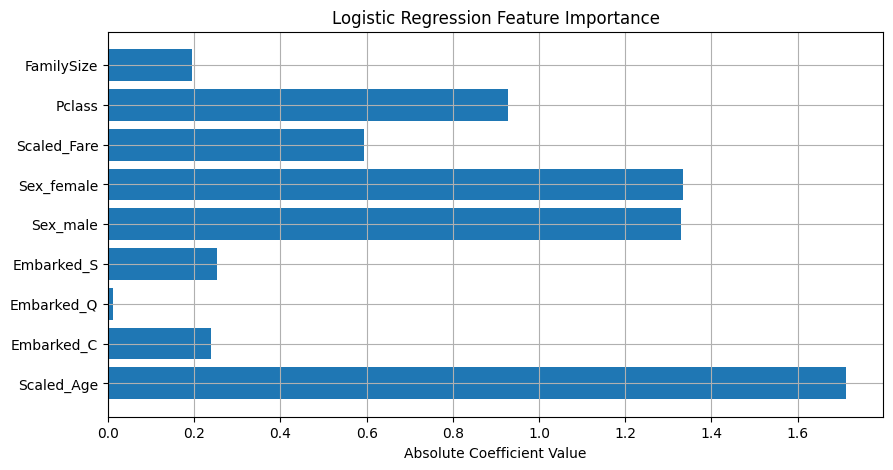

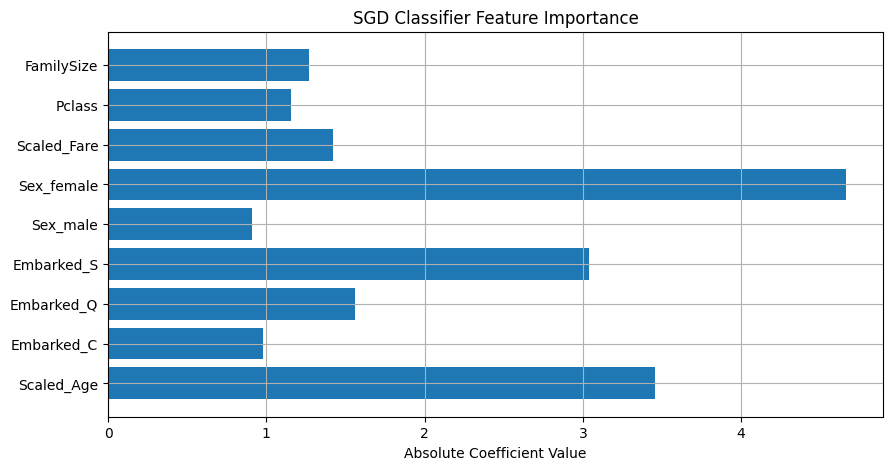

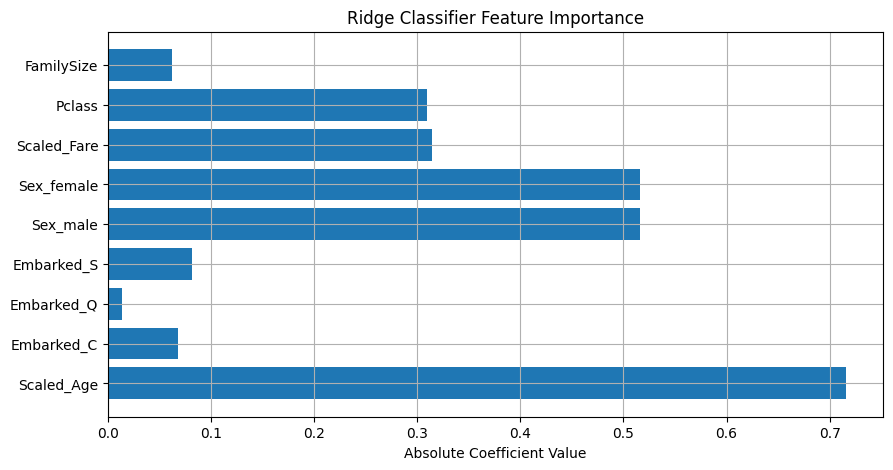

In [21]:
# Feature importance for linear models
def plot_feature_importance(model, title, feature_names):
    if hasattr(model, 'coef_'):
        coefs = model.coef_
        if hasattr(coefs, 'shape') and len(coefs.shape) > 1:
            coefs = coefs[0]
        plt.figure(figsize=(10, 5))
        plt.barh(feature_names, np.abs(coefs))
        plt.title(title)
        plt.xlabel("Absolute Coefficient Value")
        plt.grid(True)
        plt.show()

plot_feature_importance(models['Logistic Regression'], "Logistic Regression Feature Importance", X.columns)
plot_feature_importance(models['SGD Classifier'], "SGD Classifier Feature Importance", X.columns)
plot_feature_importance(models['Ridge Classifier'], "Ridge Classifier Feature Importance", X.columns)

Learning Curve Plot

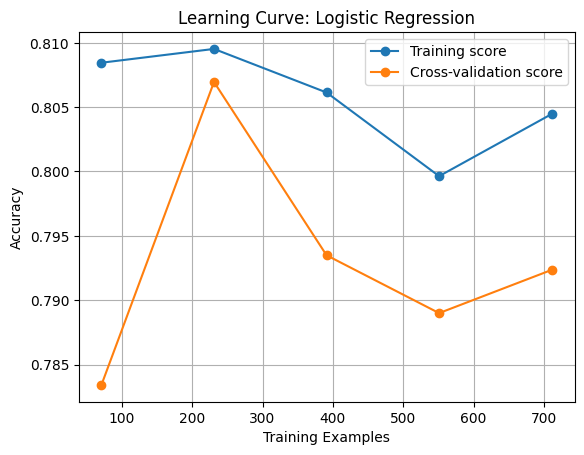

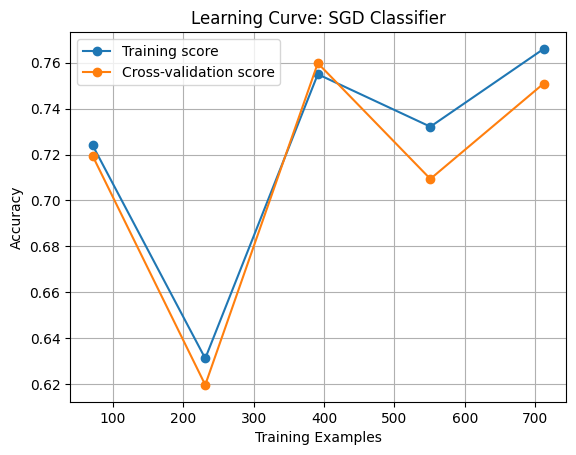

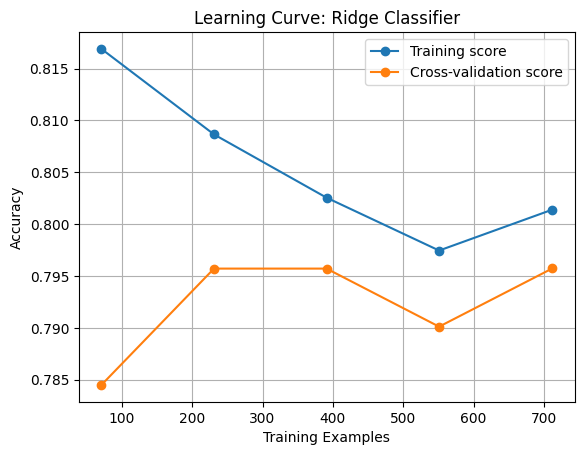

In [23]:
# Learning Curve Plot
def plot_learning_curve(model, X, y, title):
    # Explicitly cast y to integer type to ensure it's recognized as a classification target
    y_int = y.astype(int)
    train_sizes, train_scores, test_scores = learning_curve(model, X, y_int, cv=5,
                                                            train_sizes=np.linspace(0.1, 1.0, 5),
                                                            scoring='accuracy')
    train_scores_mean = train_scores.mean(axis=1)
    test_scores_mean = test_scores.mean(axis=1)
    plt.figure()
    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
    plt.title(f"Learning Curve: {title}")
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

plot_learning_curve(LogisticRegression(max_iter=1000), X, y, "Logistic Regression")
plot_learning_curve(SGDClassifier(loss='log_loss'), X, y, "SGD Classifier")
plot_learning_curve(RidgeClassifier(), X, y, "Ridge Classifier")

 Grid Search for Logistic Regression

In [25]:
# Grid Search for Logistic Regression
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
# Explicitly convert y to integer type for the classifier
grid.fit(X, y.astype(int))
print("\nBest Parameters for Logistic Regression from GridSearch:")
print(grid.best_params_)


Best Parameters for Logistic Regression from GridSearch:
{'C': 0.1}
